In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
dataset_Train = pd.read_excel('FlightPricePredictionData_Train.xlsx')
dataset_Train.head()
datasetTrainProcessed = dataset_Train.copy()


In [87]:
dataset_Test = pd.read_excel('FlightPricePredictionDataTest_set.xlsx')
dataset_Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [88]:
## We cannot use the / in the column value do change the / value
datasetTrainProcessed['Date_of_Journey'].str.split('/')

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [89]:
## convert the value having / exist in Dateof Journey and new coulumn in dataset
datasetTrainProcessed['Day'] = datasetTrainProcessed['Date_of_Journey'].str.split('/').str[0]
datasetTrainProcessed['Month'] = datasetTrainProcessed['Date_of_Journey'].str.split('/').str[1]
datasetTrainProcessed['Year'] = datasetTrainProcessed['Date_of_Journey'].str.split('/').str[2]
datasetTrainProcessed


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [90]:
# drop the column from the dataset
datasetTrainProcessed.drop('Date_of_Journey', axis=1, inplace= True)


In [91]:
datasetTrainProcessed

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [92]:
## Now split the values of departure time with :
datasetTrainProcessed['Dep_Time'].str.split(':')

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10678    [19, 55]
10679    [20, 45]
10680    [08, 20]
10681    [11, 30]
10682    [10, 55]
Name: Dep_Time, Length: 10683, dtype: object

In [93]:
datasetTrainProcessed['Dept_Hour'] = datasetTrainProcessed['Dep_Time'].str.split(':').str[0]
datasetTrainProcessed['Dept_Minutes'] = datasetTrainProcessed['Dep_Time'].str.split(':').str[1]



In [94]:
datasetTrainProcessed.drop('Dep_Time',axis=1,inplace = True)
datasetTrainProcessed

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,04,2019,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30


In [95]:
datasetTrainProcessed['Arrival_Time']
datasetTrainProcessed['Arrival_Hour'] = datasetTrainProcessed['Arrival_Time'].str.split(' ').str[0]
datasetTrainProcessed['Arrival_Day'] = datasetTrainProcessed['Arrival_Time'].str.split(' ').str[1]
datasetTrainProcessed['Arrival_Month'] = datasetTrainProcessed['Arrival_Time'].str.split(' ').str[2]


In [96]:
datasetTrainProcessed['Arrival_Hours'] = datasetTrainProcessed['Arrival_Hour'].str.split(':').str[0]
datasetTrainProcessed['Arrival_Minute'] = datasetTrainProcessed['Arrival_Hour'].str.split(':').str[1]


In [97]:
datasetTrainProcessed.drop('Arrival_Time', axis=1, inplace= True)
datasetTrainProcessed.drop('Arrival_Hour', axis=1, inplace= True)

In [98]:
datasetTrainProcessed.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minutes,Arrival_Day,Arrival_Month,Arrival_Hours,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,22,Mar,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,05,50,NaN,NaN,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,09,25,10,Jun,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,05,NaN,NaN,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,NaN,NaN,21,35


In [99]:
datasetTrainProcessed['Duration_Hour'] = datasetTrainProcessed['Duration'].str.split(' ').str[0]
datasetTrainProcessed['Duration_Minute'] = datasetTrainProcessed['Duration'].str.split(' ').str[1]
datasetTrainProcessed.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minutes,Arrival_Day,Arrival_Month,Arrival_Hours,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,22,Mar,01,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,05,50,NaN,NaN,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,09,25,10,Jun,04,25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,05,NaN,NaN,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,NaN,NaN,21,35,4h,45m


In [100]:
datasetTrainProcessed['Duration_hh'] = datasetTrainProcessed['Duration_Hour'].str.split('h').str[0]
datasetTrainProcessed['Duration_mm'] = datasetTrainProcessed['Duration_Minute'].str.split('m').str[0]
datasetTrainProcessed.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,...,Dept_Hour,Dept_Minutes,Arrival_Day,Arrival_Month,Arrival_Hours,Arrival_Minute,Duration_Hour,Duration_Minute,Duration_hh,Duration_mm
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,...,22,20,22,Mar,01,10,2h,50m,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,...,05,50,NaN,NaN,13,15,7h,25m,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,...,09,25,10,Jun,04,25,19h,NaN,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,...,18,05,NaN,NaN,23,30,5h,25m,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,...,16,50,NaN,NaN,21,35,4h,45m,4,45


In [101]:
datasetTrainProcessed.drop('Duration_Hour',axis =1, inplace=True)
datasetTrainProcessed.drop('Duration_Minute',axis =1, inplace=True)
datasetTrainProcessed.drop('Duration',axis =1, inplace=True)
datasetTrainProcessed.drop('Route',axis =1, inplace=True)
datasetTrainProcessed.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minutes,Arrival_Day,Arrival_Month,Arrival_Hours,Arrival_Minute,Duration_hh,Duration_mm
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,2019,22,20,22,Mar,01,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,2019,05,50,NaN,NaN,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,06,2019,09,25,10,Jun,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,05,2019,18,05,NaN,NaN,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,01,03,2019,16,50,NaN,NaN,21,35,4,45


In [102]:
## Check the null values in data set
datasetTrainProcessed.isnull()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minutes,Arrival_Day,Arrival_Month,Arrival_Hours,Arrival_Minute,Duration_hh,Duration_mm
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True
10681,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False


In [103]:
# to check the count of null values in the columns
datasetTrainProcessed.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           1
Additional_Info       0
Price                 0
Day                   0
Month                 0
Year                  0
Dept_Hour             0
Dept_Minutes          0
Arrival_Day        6348
Arrival_Month      6348
Arrival_Hours         0
Arrival_Minute        0
Duration_hh           0
Duration_mm        1032
dtype: int64

In [104]:
#Columns in the data set
[features for features in datasetTrainProcessed]

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day',
 'Month',
 'Year',
 'Dept_Hour',
 'Dept_Minutes',
 'Arrival_Day',
 'Arrival_Month',
 'Arrival_Hours',
 'Arrival_Minute',
 'Duration_hh',
 'Duration_mm']

In [105]:
## Fetaures with Null Value greater and equal to 1
feature_Nan_Columns = [features for features in datasetTrainProcessed.columns if datasetTrainProcessed[features].isnull().sum()>=1]
feature_Nan_Columns

['Total_Stops', 'Arrival_Day', 'Arrival_Month', 'Duration_mm']

In [106]:
#Means of Arrival_Day Fetaures
print(datasetTrainProcessed["Arrival_Day"].isnull().sum())
print(datasetTrainProcessed["Arrival_Day"].isnull().mean())

6348
0.5942151081156979


In [107]:
## To get Nan Values of columns
for features in feature_Nan_Columns:
    print(features, datasetTrainProcessed[features].isnull().sum(),'missing values')
    print(features, np.round(datasetTrainProcessed[features].isnull().mean(),4)*100,'% missing values')

Total_Stops 1 missing values
Total_Stops 0.01 % missing values
Arrival_Day 6348 missing values
Arrival_Day 59.419999999999995 % missing values
Arrival_Month 6348 missing values
Arrival_Month 59.419999999999995 % missing values
Duration_mm 1032 missing values
Duration_mm 9.66 % missing values


<Axes: ylabel='Arrival_Day'>

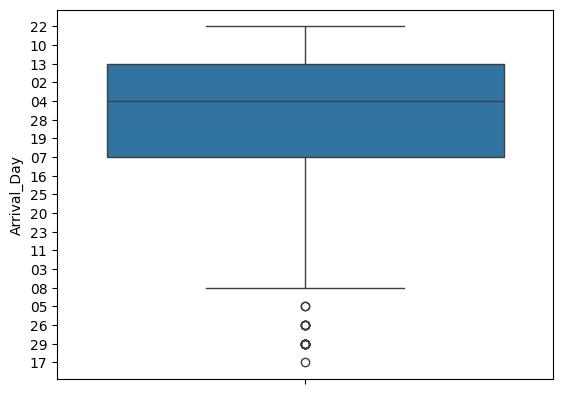

In [108]:
## All the columns where null values exist are having objecy type  

# Check if Data have Outlier
import seaborn as sns
sns.boxplot(datasetTrainProcessed['Arrival_Day'])

In [109]:
#Get the describe value
datasetTrainProcessed['Duration_mm'].describe()

count     9651
unique      11
top         30
freq      1446
Name: Duration_mm, dtype: object

In [110]:
datasetTrainProcessed.info

<bound method DataFrame.info of            Airline    Source Destination Total_Stops Additional_Info  Price  \
0           IndiGo  Banglore   New Delhi    non-stop         No info   3897   
1        Air India   Kolkata    Banglore     2 stops         No info   7662   
2      Jet Airways     Delhi      Cochin     2 stops         No info  13882   
3           IndiGo   Kolkata    Banglore      1 stop         No info   6218   
4           IndiGo  Banglore   New Delhi      1 stop         No info  13302   
...            ...       ...         ...         ...             ...    ...   
10678     Air Asia   Kolkata    Banglore    non-stop         No info   4107   
10679    Air India   Kolkata    Banglore    non-stop         No info   4145   
10680  Jet Airways  Banglore       Delhi    non-stop         No info   7229   
10681      Vistara  Banglore   New Delhi    non-stop         No info  12648   
10682    Air India     Delhi      Cochin     2 stops         No info  11753   

      Day Month  Ye

In [111]:
# Categorical Feature
categoricalFeature =[feature for feature in datasetTrainProcessed.columns if datasetTrainProcessed[feature].dtype =='O']
datasetTrainProcessed[categoricalFeature].head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Dept_Hour,Dept_Minutes,Arrival_Day,Arrival_Month,Arrival_Hours,Arrival_Minute,Duration_hh,Duration_mm
0,IndiGo,Banglore,New Delhi,non-stop,No info,24,03,2019,22,20,22,Mar,01,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,1,05,2019,05,50,NaN,NaN,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,9,06,2019,09,25,10,Jun,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,12,05,2019,18,05,NaN,NaN,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,01,03,2019,16,50,NaN,NaN,21,35,4,45


In [112]:
categoricalFeatureNan = [feature for feature in datasetTrainProcessed[categoricalFeature] if datasetTrainProcessed[feature].isnull().sum() >=1]
categoricalFeatureNan

['Total_Stops', 'Arrival_Day', 'Arrival_Month', 'Duration_mm']

In [113]:
for feature in categoricalFeatureNan:
    print(' the feature in {} missing value are {} with percentage {} % missing value'.format(feature, 
    datasetTrainProcessed[feature].isnull().sum(),
    np.round(datasetTrainProcessed[feature].isnull().mean()*100,2)
     ))

 the feature in Total_Stops missing value are 1 with percentage 0.01 % missing value
 the feature in Arrival_Day missing value are 6348 with percentage 59.42 % missing value
 the feature in Arrival_Month missing value are 6348 with percentage 59.42 % missing value
 the feature in Duration_mm missing value are 1032 with percentage 9.66 % missing value


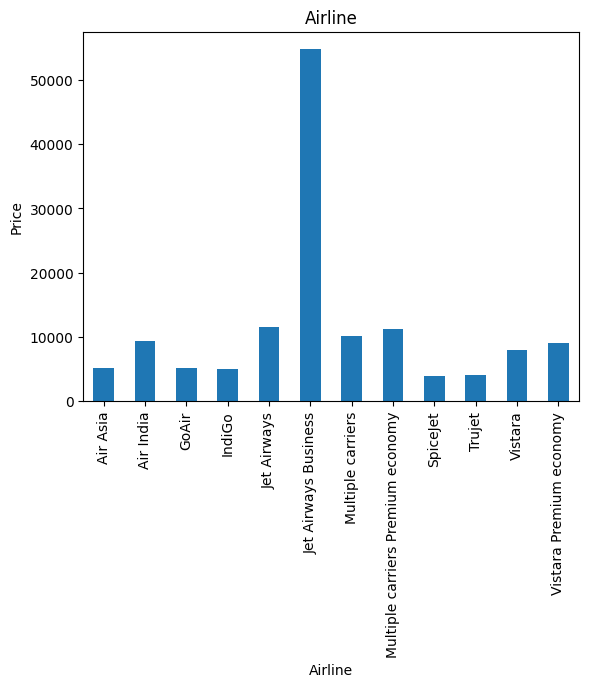

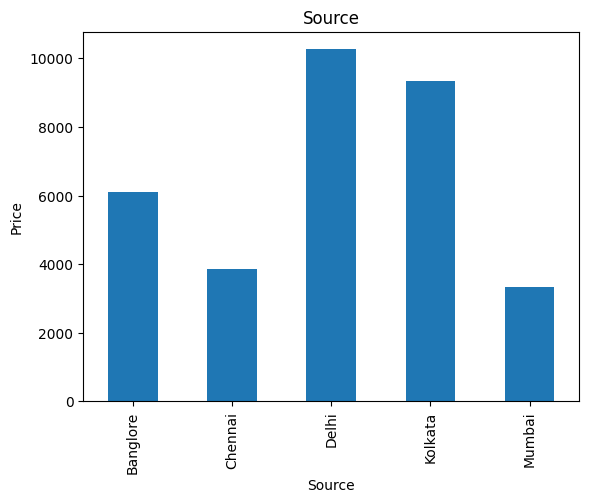

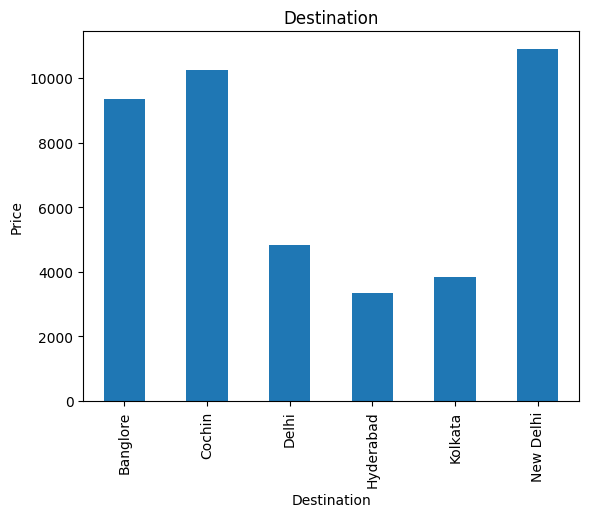

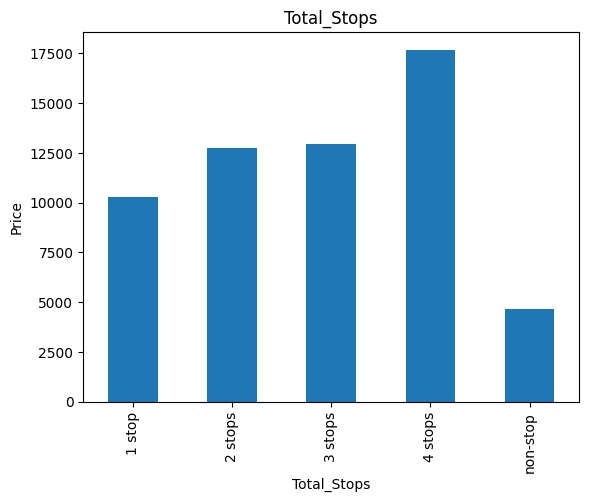

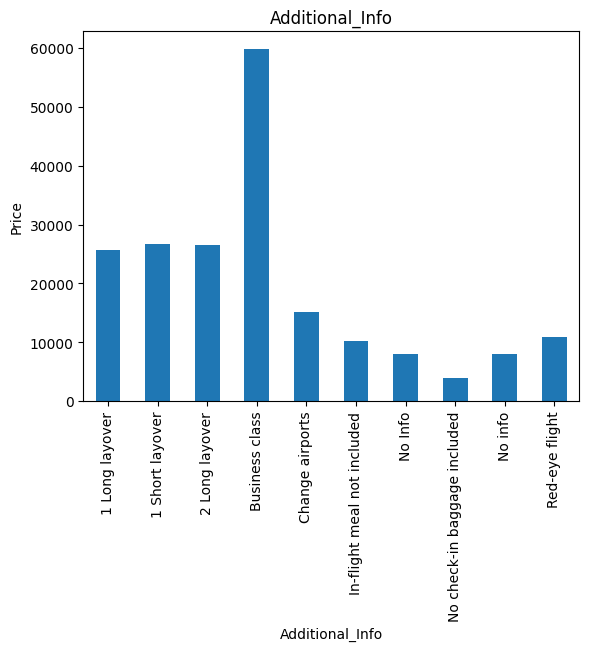

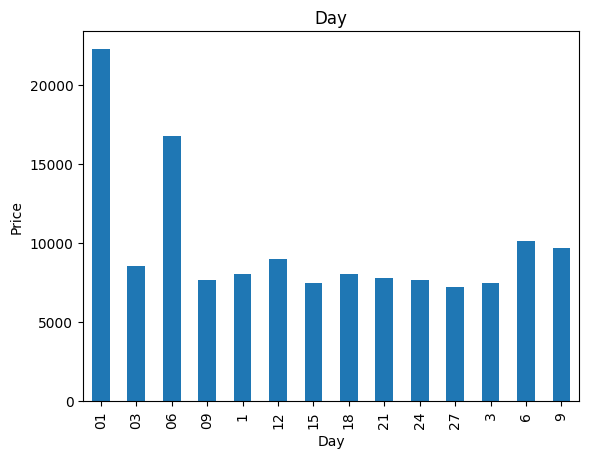

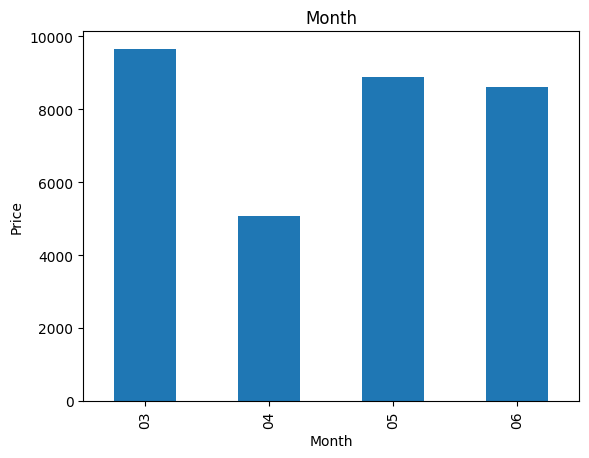

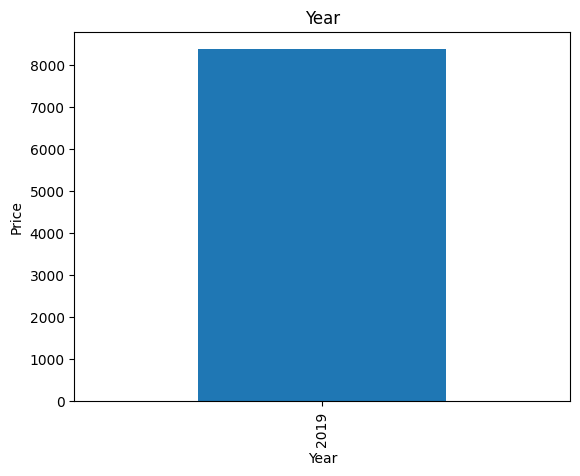

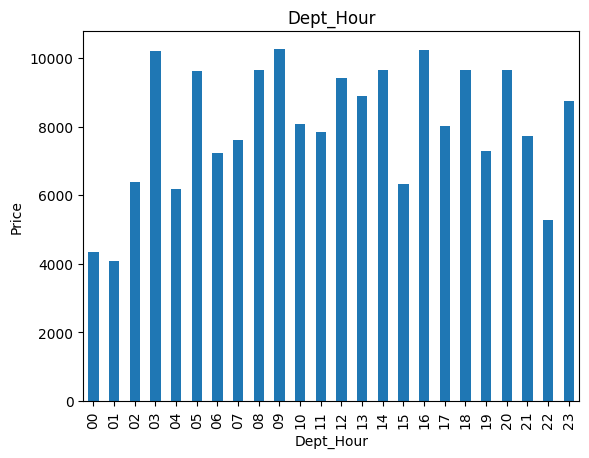

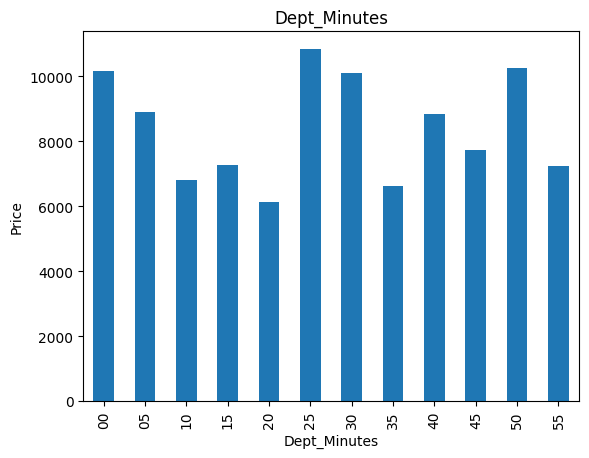

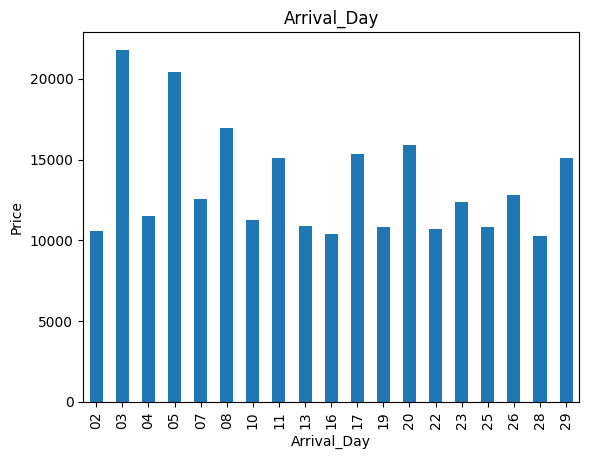

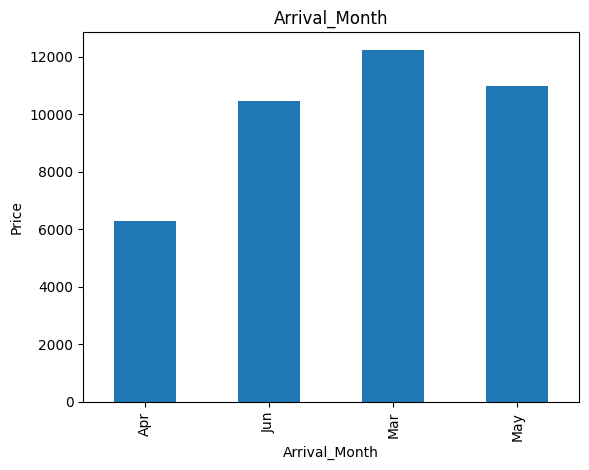

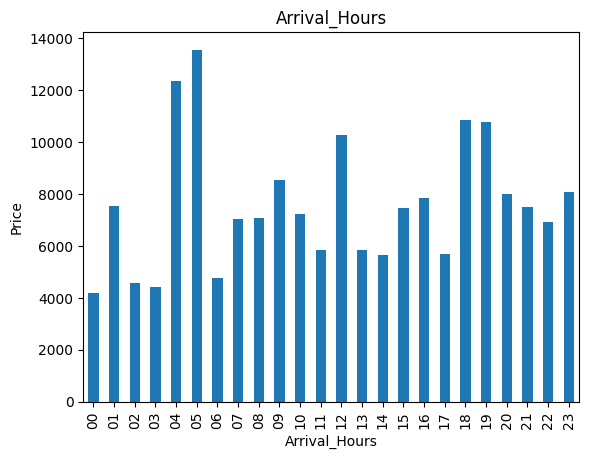

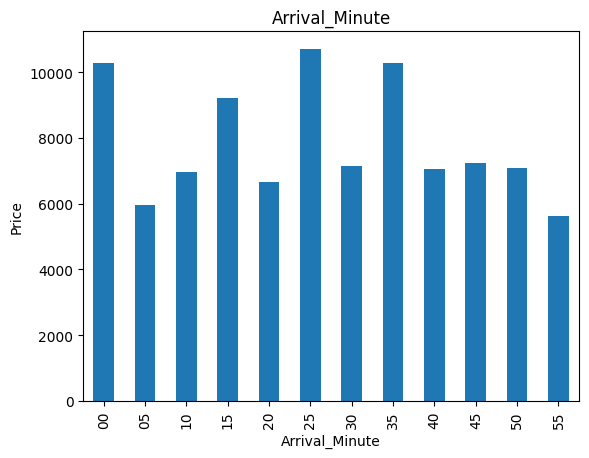

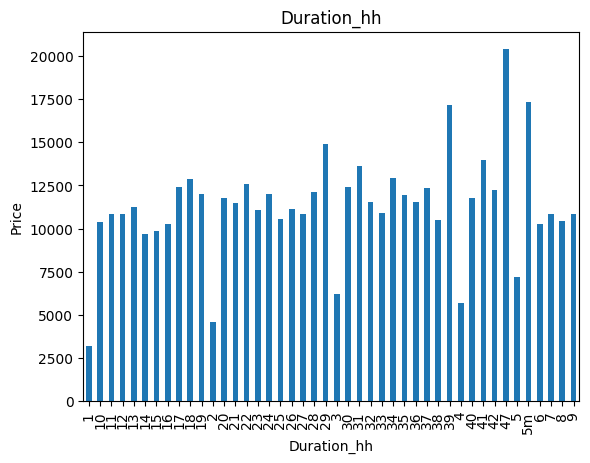

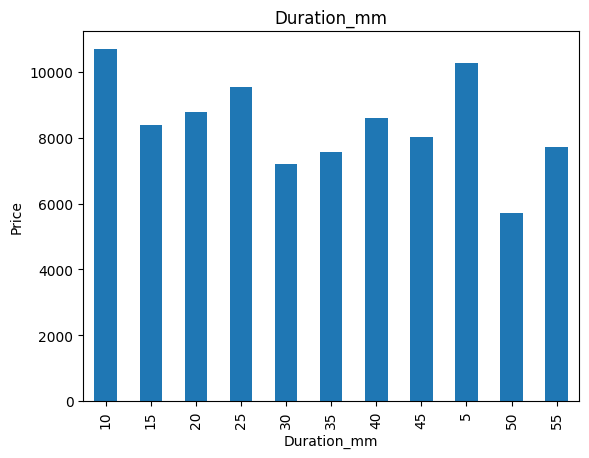

In [114]:
# Find the relationship between categorical feature on  price
data = datasetTrainProcessed.copy()
for feature in categoricalFeature:
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [115]:
dataset_Test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [116]:
## convert the value having / exist in Dateof Journey and new columns in dataset
dataset_Test['Day'] = dataset_Test['Date_of_Journey'].str.split('/').str[0]
dataset_Test['Month'] = dataset_Test['Date_of_Journey'].str.split('/').str[1]
dataset_Test['Year'] = dataset_Test['Date_of_Journey'].str.split('/').str[2]
dataset_Test.drop('Date_of_Journey', axis=1, inplace= True)
dataset_Test

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,06,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,03,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,03,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,03,2019


In [117]:

## Now split the values of departure time with :
dataset_Test['Dep_Time'].str.split(':')
dataset_Test['Dept_Hour'] = dataset_Test['Dep_Time'].str.split(':').str[0]
dataset_Test['Dept_Minutes'] = dataset_Test['Dep_Time'].str.split(':').str[1]
dataset_Test.drop('Dep_Time',axis=1,inplace = True)
dataset_Test

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dept_Hour,Dept_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,05,2019,06,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,05,2019,08,00
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,6,06,2019,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,27,03,2019,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,6,03,2019,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,6,03,2019,04,00


In [118]:
dataset_Test['Arrival_Time']
dataset_Test['Arrival_Hour'] = dataset_Test['Arrival_Time'].str.split(' ').str[0]
dataset_Test['Arrival_Day'] = dataset_Test['Arrival_Time'].str.split(' ').str[1]
dataset_Test['Arrival_Month'] = dataset_Test['Arrival_Time'].str.split(' ').str[2]
dataset_Test['Arrival_Hours'] = dataset_Test['Arrival_Hour'].str.split(':').str[0]
dataset_Test['Arrival_Minute'] = dataset_Test['Arrival_Hour'].str.split(':').str[1]
dataset_Test.drop('Arrival_Time', axis=1, inplace= True)
dataset_Test.drop('Arrival_Hour', axis=1, inplace= True)
dataset_Test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dept_Hour,Dept_Minutes,Arrival_Day,Arrival_Month,Arrival_Hours,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,06,2019,17,30,07,Jun,04,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,05,2019,06,20,NaN,NaN,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,05,2019,19,15,22,May,19,00
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,05,2019,08,00,NaN,NaN,21,00
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,06,2019,23,55,25,Jun,02,45


In [119]:
dataset_Test['Duration_Hour'] = dataset_Test['Duration'].str.split(' ').str[0]
dataset_Test['Duration_Minute'] = dataset_Test['Duration'].str.split(' ').str[1]
dataset_Test['Duration_hh'] = dataset_Test['Duration_Hour'].str.split('h').str[0]
dataset_Test['Duration_mm'] = dataset_Test['Duration_Minute'].str.split('m').str[0]
dataset_Test.drop('Duration_Hour',axis =1, inplace=True)
dataset_Test.drop('Duration_Minute',axis =1, inplace=True)
dataset_Test.drop('Duration',axis =1, inplace=True)
dataset_Test.drop('Route',axis =1, inplace=True)
dataset_Test.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Dept_Hour,Dept_Minutes,Arrival_Day,Arrival_Month,Arrival_Hours,Arrival_Minute,Duration_hh,Duration_mm
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,06,2019,17,30,07,Jun,04,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,05,2019,06,20,NaN,NaN,10,20,4,NaN
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,05,2019,19,15,22,May,19,00,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,05,2019,08,00,NaN,NaN,21,00,13,NaN
4,Air Asia,Banglore,Delhi,non-stop,No info,24,06,2019,23,55,25,Jun,02,45,2,50


# Comapre the Test and Train data set

<Axes: >

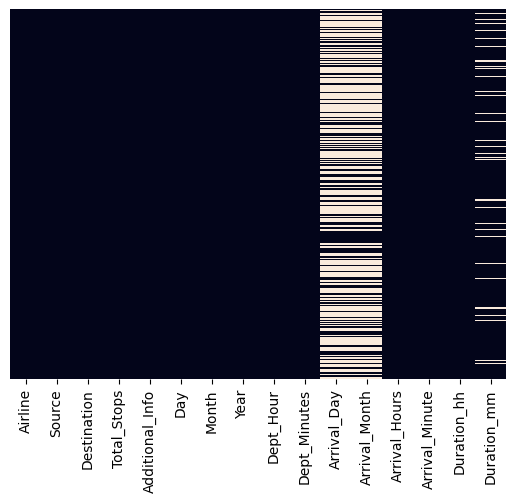

In [120]:
## To get the null values in the data. White color show the null values
sns.heatmap(dataset_Test.isnull(),yticklabels=False,cbar=False)

<Axes: >

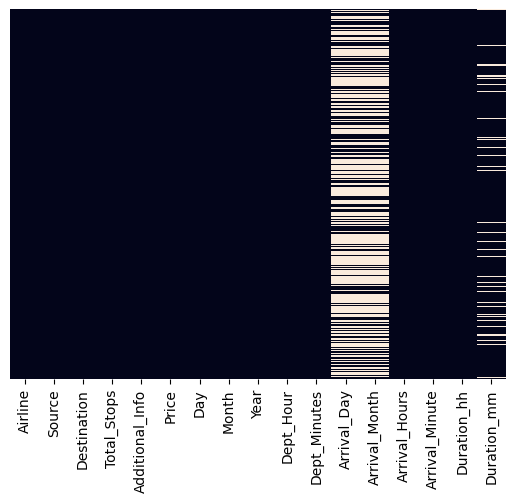

In [121]:
## To get the null values in the data. White color show the null values
sns.heatmap(datasetTrainProcessed.isnull(),yticklabels=False,cbar=False)

In [122]:
## Get the information about Test dataSet
dataset_Test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Total_Stops      2671 non-null   object
 4   Additional_Info  2671 non-null   object
 5   Day              2671 non-null   object
 6   Month            2671 non-null   object
 7   Year             2671 non-null   object
 8   Dept_Hour        2671 non-null   object
 9   Dept_Minutes     2671 non-null   object
 10  Arrival_Day      1066 non-null   object
 11  Arrival_Month    1066 non-null   object
 12  Arrival_Hours    2671 non-null   object
 13  Arrival_Minute   2671 non-null   object
 14  Duration_hh      2671 non-null   object
 15  Duration_mm      2417 non-null   object
dtypes: object(16)
memory usage: 334.0+ KB


In [123]:
print(dataset_Test.isnull().sum())

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Day                   0
Month                 0
Year                  0
Dept_Hour             0
Dept_Minutes          0
Arrival_Day        1605
Arrival_Month      1605
Arrival_Hours         0
Arrival_Minute        0
Duration_hh           0
Duration_mm         254
dtype: int64


In [124]:
## Feature Engineering on Categorical DataSet
# To check the non object type with null values
[feature for feature in datasetTrainProcessed.columns if datasetTrainProcessed[feature].dtype == 'object' and datasetTrainProcessed[feature].isnull().sum()>=1]


['Total_Stops', 'Arrival_Day', 'Arrival_Month', 'Duration_mm']

In [125]:
for feature in categoricalFeatureNan:
    print(' the feature in {} missing value are {} with percentage {} % missing value'.format(feature, 
    datasetTrainProcessed[feature].isnull().sum(),
    np.round(datasetTrainProcessed[feature].isnull().mean()*100,2)
     ))

 the feature in Total_Stops missing value are 1 with percentage 0.01 % missing value
 the feature in Arrival_Day missing value are 6348 with percentage 59.42 % missing value
 the feature in Arrival_Month missing value are 6348 with percentage 59.42 % missing value
 the feature in Duration_mm missing value are 1032 with percentage 9.66 % missing value


In [126]:
## In Categorical Feature we find the columns which have null values > = 50 and remove those from analysis
datasetTrainProcessed.drop(['Arrival_Day','Arrival_Month'],axis=1, inplace=True)

In [127]:
## In Categorical Feature we find the columns which have null values > = 50 and remove those from analysis
dataset_Test.drop(['Arrival_Day','Arrival_Month'],axis=1, inplace=True)

In [129]:
## Convert the nan values of remaining columns with mode values
datasetTrainProcessed['Total_Stops'] = datasetTrainProcessed['Total_Stops'].fillna(datasetTrainProcessed['Total_Stops'].mode()[0])
datasetTrainProcessed['Duration_mm'] = datasetTrainProcessed['Duration_mm'].fillna(datasetTrainProcessed['Duration_mm'].mode()[0])

In [130]:
## Convert the nan values of remaining columns with mode values
dataset_Test['Total_Stops'] = dataset_Test['Total_Stops'].fillna(dataset_Test['Total_Stops'].mode()[0])
dataset_Test['Duration_mm'] = dataset_Test['Duration_mm'].fillna(dataset_Test['Duration_mm'].mode()[0])

<Axes: >

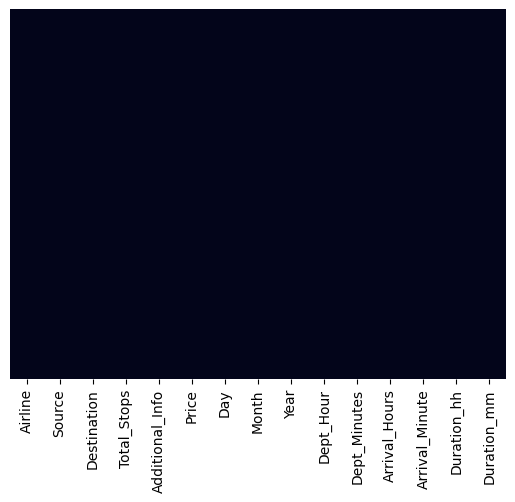

In [131]:
# Heat map for Train dataSet
sns.heatmap(datasetTrainProcessed.isnull(),yticklabels=False,cbar=False)

<Axes: >

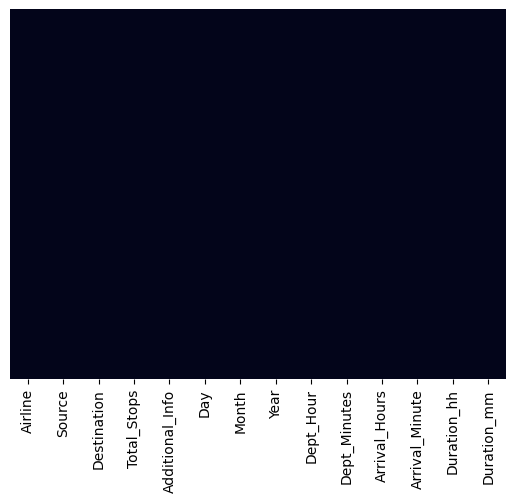

In [132]:
sns.heatmap(dataset_Test.isnull(),yticklabels=False,cbar=False)